In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

print(tf.__version__) 

Found GPU at: 
2.2.0


In [2]:
from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
from IPython.display import clear_output

In [5]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

def resize( img, scale_percent= 60, verbose=False):
  #scale_percent = 60 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  if verbose:
    print( "scale", scale_percent)
    print( "dim", dim)
  # resize image
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [6]:
import time

In [7]:
import shutil

In [8]:
from shutil import copyfile

In [ ]:
#
# passo 3.1 - limipar fullpage
#

In [10]:
img_folder= 'C:/mestrado/datasets/unified/final-5K/test.clean/images'
img_files= glob( os.path.join( img_folder, "*.jpg"))
images= [cv2.imread( f) for f in img_files]
pgn_folder= 'C:/mestrado/datasets/unified/final-5K/test.clean/labels'
pgn_files= glob( os.path.join( pgn_folder, "*.pgn"))
labels= [read_label( f) for f in pgn_files]
print( 'lidos', len( img_files))

lidos 118


C:/mestrado/datasets/unified/final-5K/test.clean/images\carnaval_0676_fullpage.jpg
['d4', 'Nf6', 'Nf3', 'd5', 'Bf4', 'Bf5', 'e3', 'e6', 'Bd3', 'Bd6', 'Bg3', 'Ne4', 'Be5', 'f6', 'Bg3', 'Qe7', 'Bxd6', 'Qxd6', 'O-O', 'O-O', 'c4', 'c6', 'Nc3', 'Qb4', 'Qc2', 'Nd6', 'Bxf5', 'Nxf5', 'cxd5', 'cxd5', 'Nxd5', 'exd5', 'Qxf5', 'Qd6', 'Rfc1', 'Nc6', 'a3', 'Ne7', 'Qh3', 'Rac8', 'g3', 'Rc6', 'Qf1', 'Rfc8', 'Qd1', 'Qc7', 'Rcb1', 'Nf5', 'Qb3', 'Qd7', 'Ne1', 'Rb6', 'Qd1', 'Nd6', 'Nd3', 'Qf5', 'Nc5', 'Ne4', 'Nxe4', 'Qxe4', 'Qe2', 'Qc2']


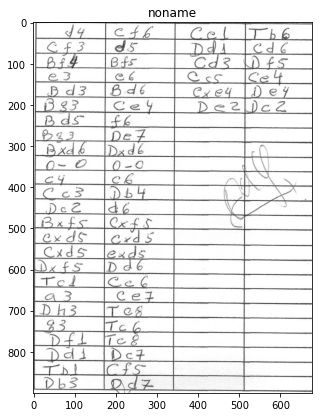

len= 62
['d4', 'Nf6'] ['Ne1', 'Rb6']
['Qb3', 'Qd7'] []



In [11]:

def showbig( img, name= 'noname'):
    plt.figure(figsize = (5,10))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (2,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    

k= len( img_files)
kk= 0
m= None
hold= None
_f= None
_lab= None

for i in range( 0, len( img_files)):
    img= images[i]
    label= labels[i].split()
    f= img_files[i]
    clear_output()
#     print( 'prev', _f)
#     if hold:
#         print( "MOVIDO PARA -HOLD =>", Path(hold).name)
        
#     print( '----------------')
#     print( k, kk, f)
#     k-= 1
#     kk+= 1
    print( img_files[i])

#     showbig( img[(img.shape[0]-200):img.shape[0],(img.shape[1]-800):img.shape[1]])
    print( label)
    showbig( img)
    print( 'len=', len( label))
    if( len( label)< 32):
        print( "MENOR QUE 32!!")
    print( label[0:1+1], label[50:51+1], )
    print( label[48:49+1], label[98:99+1], )

    m= input()
    _f= f
    hold= None
    if m is None or len( m)<= 0:
        pass
    elif m=='x':
        print( 'bye!')
        break
    else:
        hold= f
        print( "move original para hold")
        shutil.move( 
            os.path.join( img_folder, Path(f).name), 
            os.path.join( img_folder, '_hold'))

In [13]:
#
# limpa arquivos que nao tem correspondente 
#

img_folder= 'C:/mestrado/datasets/unified/final-5K/test.clean/images'
img_files= glob( os.path.join( img_folder, "*.jpg"))

pgn_folder= 'C:/mestrado/datasets/unified/final-5K/test.clean/labels'
pgn_files= glob( os.path.join( pgn_folder, "*.pgn"))

for f in pgn_files:
    imgfile= f.replace( 'labels', 'images').replace( '.pgn', '.jpg')
    if( not os.path.exists( imgfile)):
        print( imgfile, 'not found')
        shutil.move( 
            os.path.join( f), 
            os.path.join( pgn_folder, '_hold'))


C:/mestrado/datasets/unified/final-5K/test.clean/images\carnaval_0042_fullpage.jpg not found
C:/mestrado/datasets/unified/final-5K/test.clean/images\carnaval_0047_fullpage.jpg not found
C:/mestrado/datasets/unified/final-5K/test.clean/images\carnaval_0059_fullpage.jpg not found
C:/mestrado/datasets/unified/final-5K/test.clean/images\carnaval_0068_fullpage.jpg not found
C:/mestrado/datasets/unified/final-5K/test.clean/images\carnaval_0072_fullpage.jpg not found
C:/mestrado/datasets/unified/final-5K/test.clean/images\carnaval_0076_fullpage.jpg not found
C:/mestrado/datasets/unified/final-5K/test.clean/images\carnaval_0080_fullpage.jpg not found
C:/mestrado/datasets/unified/final-5K/test.clean/images\carnaval_0086_fullpage.jpg not found
C:/mestrado/datasets/unified/final-5K/test.clean/images\carnaval_0090_fullpage.jpg not found
C:/mestrado/datasets/unified/final-5K/test.clean/images\carnaval_0106_fullpage.jpg not found
C:/mestrado/datasets/unified/final-5K/test.clean/images\carnaval_0109_

In [ ]:
#
# remove menores do que 32
#
img_folder= 'C:/mestrado/datasets/unified/final-5K-v2.draft/train/images'
img_files= glob( os.path.join( img_folder, "*.jpg"))

pgn_folder= 'C:/mestrado/datasets/unified/final-5K-v2.draft/train/labels'
pgn_files= glob( os.path.join( pgn_folder, "*.pgn"))
labels= [read_label( f) for f in pgn_files]

In [ ]:
qtd= 0
for i in range( 0, len( pgn_files)):
    llen= len( labels[i].split())
    if llen< 32:
        qtd+= 1
        print( 'len=', llen, ' menor que 32 para ', Path( pgn_files[i]).name, '. move para hold..')
        shutil.move( 
            img_files[i], 
            os.path.join( img_folder, '_hold'))
        shutil.move( 
            pgn_files[i], 
            os.path.join( pgn_folder, '_hold'))

print( 'total', qtd)

In [ ]:
#
# complement with removed
#
n= 236


origin_folder= 'C:/mestrado/datasets/unified/parts/sync-except-handwritten'
origin_files= glob( os.path.join( origin_folder, 'images', "*.jpg"))

target_folder= 'C:/mestrado/datasets/unified/final-5K-v2.draft/train'
# target_img_files= glob( os.path.join( img_folder, "*.jpg"))

# pgn_folder= 'C:/mestrado/datasets/unified/final-5K-v2.draft/train/labels'
# pgn_files= glob( os.path.join( pgn_folder, "*.pgn"))
# labels= [read_label( f) for f in pgn_files]

for i in range( 0, len( origin_files)):
    f= origin_files[i]
#     print( Path( origin_files[i]).name)
    file_in_target= os.path.join( target_folder, 'images', os.path.join( Path( f).name))
    if not os.path.exists( file_in_target):
        label= read_label( f.replace( 'images', 'labels').replace( '.jpg', '.pgn')).split()
        if( len( label)>= 32):
            print( i, len( label), Path( origin_files[i]).name)
            shutil.copyfile( f, file_in_target)
            shutil.copyfile( 
                f.replace( 'images', 'labels').replace( '.jpg', '.pgn'), 
                file_in_target.replace( 'images', 'labels').replace( '.jpg', '.pgn'))
            n= n-1
            if n<= 0:
                print( 'done')
                break


In [14]:
from sklearn.model_selection import train_test_split


In [12]:
#
# split -train validation
#
img_folder= 'C:/mestrado/datasets/unified/parts/carnaval_fullpage_shuffle/train/images'
img_files= glob( os.path.join( img_folder, "*.jpg"))

pgn_folder= 'C:/mestrado/datasets/unified/parts/carnaval_fullpage_shuffle/train/labels'
pgn_files= glob( os.path.join( pgn_folder, "*.pgn"))


# Create training and validation sets using an 80-20 split
t_img_files, v_img_files, t_pgn_files, v_pgn_files = train_test_split(img_files,
                                                                    pgn_files,
                                                                    test_size=0.20, 
                                                                    random_state=0)
print( len( t_img_files), len(v_img_files), len(t_pgn_files), len(v_pgn_files))

for f in v_img_files:
#     print( 'move', f)
    shutil.move( f, 'C:/mestrado/datasets/unified/parts/carnaval_fullpage_shuffle/valid/images')
for f in v_pgn_files:
#     print( 'move', f)
    shutil.move( f, 'C:/mestrado/datasets/unified/parts/carnaval_fullpage_shuffle/valid/labels')



4000 1000 4000 1000
